In [1]:
import pandas as pd
import json

In [39]:
json_path = '../vgg_15_BN_64/10_default_100_021/log.json'

In [40]:
with open(json_path) as f:
    log = json.load(f)

In [41]:
df = pd.DataFrame(log)

In [42]:
df_new = pd.concat([df.drop(['test','train'], axis=1), df['train'].apply(pd.Series), df['test'].apply(pd.Series)], axis=1)

In [43]:
df_new = df_new.rename(columns={"loss": "train_loss", "accuracy": "train_accuracy", "time":"train_time"})

In [44]:
col_list = [df_new.drop(['CIFAR10', 'CIFAR101', 'CIFAR102','CIFAR10_10K'], axis=1),
    df_new['CIFAR10'].apply(pd.Series),
    df_new['CIFAR101'].apply(pd.Series),
    df_new['CIFAR102'].apply(pd.Series),
    df_new['CIFAR10_10K'].apply(pd.Series),]
df_result = pd.concat(col_list, axis=1)

In [45]:
df_result.columns = ['epoch','train_loss','train_accuracy','train_time',
                     'cifar10_loss','cifar10_accuracy','cifar10_time',
                     'cifar101_loss','cifar101_accuracy','cifar101_time',
                     'cifar102_loss','cifar102_accuracy','cifar102_time',
                     'cifar10_10k_loss','cifar10_10k_accuracy','cifar10_10k_time',
                    ]

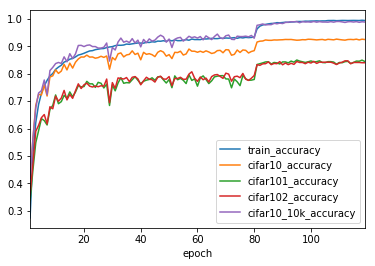

In [46]:
df_result.plot(x='epoch', y=['train_accuracy','cifar10_accuracy','cifar101_accuracy','cifar102_accuracy','cifar10_10k_accuracy',])

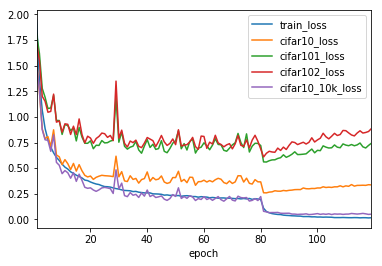

In [47]:
df_result.plot(x='epoch', y=['train_loss','cifar10_loss','cifar101_loss','cifar102_loss','cifar10_10k_loss'])